In [58]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
train_dir = train_datagen.flow_from_directory(r'C:\Users\user\Desktop\Jupyter\Datasets\brain_tumor_dataset\train',
                                             target_size = (200, 200), batch_size = 32, classes = ['no','yes'])
test_dir = test_datagen.flow_from_directory(r'C:\Users\user\Desktop\Jupyter\Datasets\brain_tumor_dataset\test',
                                             target_size = (200, 200), batch_size = 32)
val_dir = val_datagen.flow_from_directory(r'C:\Users\user\Desktop\Jupyter\Datasets\brain_tumor_dataset\valid',
                                             target_size = (200, 200), batch_size = 32, classes = ['no','yes'])

Found 139 images belonging to 2 classes.
Found 28 images belonging to 1 classes.
Found 31 images belonging to 2 classes.


In [50]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), strides = 2,input_shape = (200, 200, 3), activation ='relu'),
    keras.layers.MaxPool2D((2,2), strides = 2),
    keras.layers.Conv2D(32, (3,3), strides = 2, activation ='relu'),
    keras.layers.MaxPool2D((2,2), strides = 2),
    keras.layers.Conv2D(32, (3,3), strides = 2, activation ='relu'),
    keras.layers.MaxPool2D((2,2), strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation ='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation ='softmax')
    
])

In [51]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 99, 99, 16)        448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 32)          9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 32)        

In [53]:
history = model.fit(train_dir, epochs = 20, validation_data = val_dir)

Epoch 1/20
5/5 [==============================] - 3s 257ms/step - loss: 0.6822 - accuracy: 0.6115 - val_loss: 0.6229 - val_accuracy: 0.6452
Epoch 2/20
5/5 [==============================] - 1s 160ms/step - loss: 0.6667 - accuracy: 0.6043 - val_loss: 0.6220 - val_accuracy: 0.6452
Epoch 3/20
5/5 [==============================] - 1s 157ms/step - loss: 0.6542 - accuracy: 0.6187 - val_loss: 0.6284 - val_accuracy: 0.6452
Epoch 4/20
5/5 [==============================] - 1s 168ms/step - loss: 0.6528 - accuracy: 0.6043 - val_loss: 0.6247 - val_accuracy: 0.6452
Epoch 5/20
5/5 [==============================] - 1s 158ms/step - loss: 0.6351 - accuracy: 0.6115 - val_loss: 0.6157 - val_accuracy: 0.6452
Epoch 6/20
5/5 [==============================] - 1s 153ms/step - loss: 0.6237 - accuracy: 0.6403 - val_loss: 0.6024 - val_accuracy: 0.6774
Epoch 7/20
5/5 [==============================] - 1s 159ms/step - loss: 0.6105 - accuracy: 0.7194 - val_loss: 0.6041 - val_accuracy: 0.7097
Epoch 8/20
5/5 [====

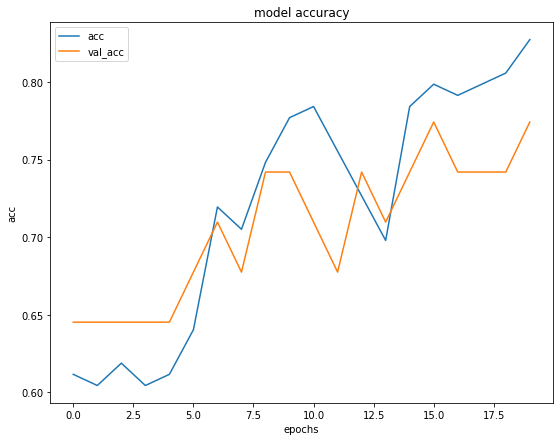

In [54]:
plt.figure(figsize = (9,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('model accuracy')
plt.legend(['acc', 'val_acc'])

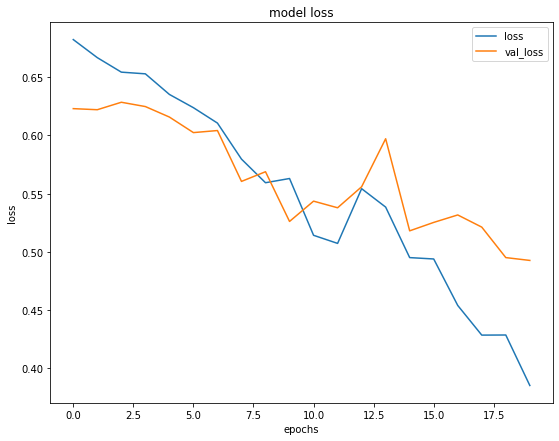

In [55]:
plt.figure(figsize = (9,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['loss', 'val_loss'])

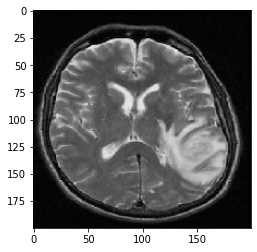

In [56]:
plt.imshow(test_dir[0][0][0])

In [57]:
pred = model.predict(test_dir)
pred

1/1 [==============================] - 0s 287ms/step


array([[0.41199467, 0.5880053 ],
       [0.01263148, 0.9873685 ],
       [0.00701666, 0.99298334],
       [0.9498915 , 0.05010847],
       [0.13193671, 0.86806333],
       [0.23420921, 0.7657908 ],
       [0.5190096 , 0.48099044],
       [0.00122611, 0.9987739 ],
       [0.9593013 , 0.04069872],
       [0.95533895, 0.044661  ],
       [0.9945825 , 0.00541755],
       [0.27946588, 0.7205341 ],
       [0.4507704 , 0.54922956],
       [0.98130953, 0.01869043],
       [0.00138377, 0.9986162 ],
       [0.00383624, 0.9961637 ],
       [0.01242931, 0.9875707 ],
       [0.85895896, 0.14104098],
       [0.00416325, 0.99583673],
       [0.989365  , 0.01063499],
       [0.962268  , 0.03773194],
       [0.01828306, 0.98171693],
       [0.7651332 , 0.23486678],
       [0.7381119 , 0.2618881 ],
       [0.03266727, 0.9673327 ],
       [0.94870275, 0.05129727],
       [0.00307131, 0.99692875],
       [0.00727871, 0.99272126]], dtype=float32)

In [59]:
lab = []
for i in pred:
    lab.append(np.argmax(i))
lab

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1]

In [63]:
for i in range(10):
    if i ==1:
        print('Less likely to have a brain tumour')
    else:
        print("High possibility of brain tumour")

High possibility of brain tumour
Less likely to have a brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour
High possibility of brain tumour


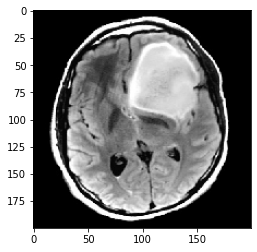

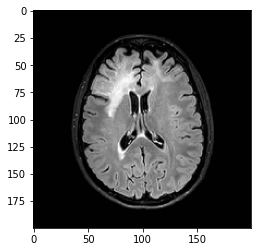

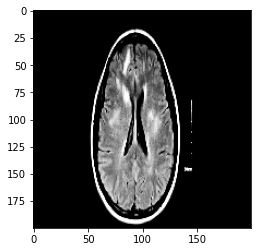

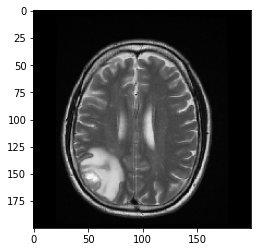

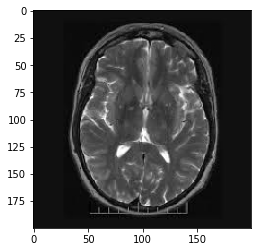

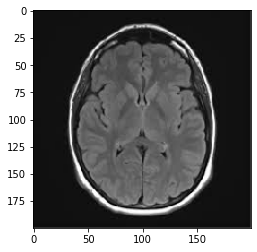

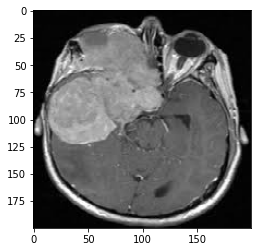

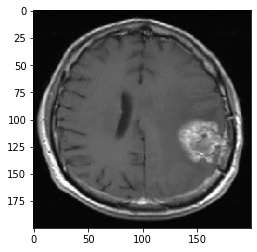

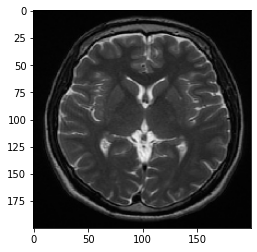

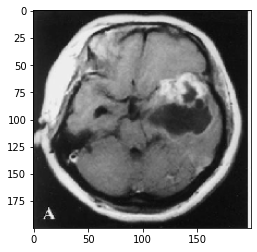

In [71]:
try:
    for i in range(10):
        plt.imshow(test_dir[0][0][i])
        plt.show()
except:
    pass